In [2]:
from readRinexObs import rinexobs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
from pandas import DataFrame, Panel4D, read_hdf
from glob import glob
from datetime import datetime
import time

In [3]:
files = glob("/home/greg/Documents/Summer Research/rinex files/mah*")

svn = 23

convertL1ToMeters = 3.0E8/(154.0*10.23E6)
convertL2ToMeters = 3.0E8/(120.0*10.23E6)
f2f1Factor = 1.545727
convertMetersToTEC = 6.158

start = datetime(year=2015,month=10,day=7,hour=6,minute=0,second=49)
end = datetime(year=2015,month=10,day=7,hour=7,minute=7,second=30)

dat = {}

t=time.time()
for file in files:  
    d = rinexobs(file)
    dat[file.split('/')[-1]] = d[start:end,svn,:,:]
data = Panel4D(dat)
print("Seconds to read all files {0:.2f}".format(time.time()-t))
data.to_hdf('svn23.h5','data',format='table')


/home/greg/Documents/Summer Research/rinex files/mah62800.15o is a RINEX 2.11 file, 31649.899 kB.
30.61 seconds for _block2df
17.10 seconds for panel assignments
finished in 50.99 seconds
/home/greg/Documents/Summer Research/rinex files/mah32800.15o is a RINEX 2.11 file, 38072.718 kB.
31.76 seconds for _block2df
17.07 seconds for panel assignments
finished in 51.97 seconds
/home/greg/Documents/Summer Research/rinex files/mah52800.15o is a RINEX 2.11 file, 35699.333 kB.
32.45 seconds for _block2df
16.99 seconds for panel assignments
finished in 52.57 seconds
/home/greg/Documents/Summer Research/rinex files/mah72800.15o is a RINEX 2.11 file, 35799.149 kB.
31.43 seconds for _block2df
17.06 seconds for panel assignments
finished in 51.96 seconds
/home/greg/Documents/Summer Research/rinex files/mah42800.15o is a RINEX 2.11 file, 37584.842 kB.
35.67 seconds for _block2df
20.14 seconds for panel assignments
finished in 59.28 seconds
/home/greg/Documents/Summer Research/rinex files/mah92800.15

TypeError: cannot properly create the storer for: [_STORER_MAP] [group->/data (Group) '',value-><class 'pandas.core.panelnd.Panel4D'>,format->fixed,append->False,kwargs->{'encoding': None}]

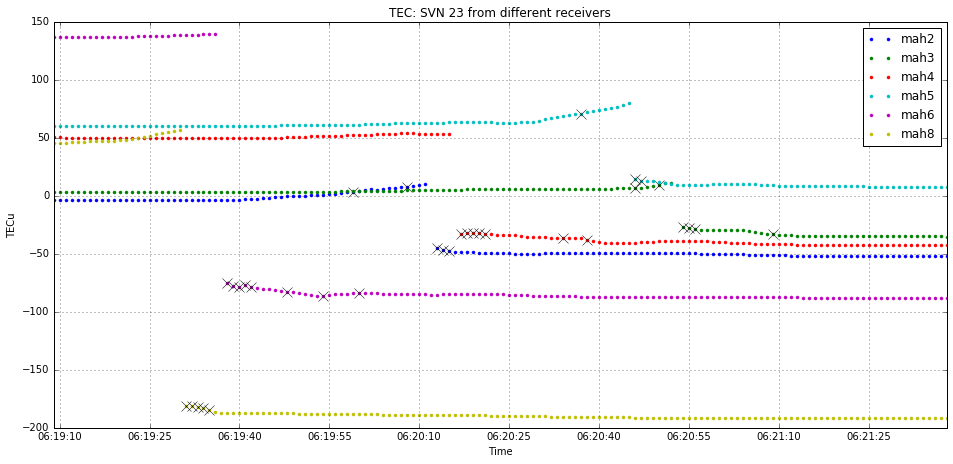

In [3]:
data = read_hdf('svn23.h5','data')
fig = plt.figure(figsize=(16,16))
ax1 = plt.subplot(211)
fmt = DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(fmt)
ax1.autoscale_view()
plt.title('TEC: SVN 23 from different receivers')
plt.xlabel('Time')
plt.ylabel('TECu')


convertL1ToMeters = 3.0E8/(154.0*10.23E6)
convertL2ToMeters = 3.0E8/(120.0*10.23E6)
f2f1Factor = 1.545727
convertMetersToTEC = 6.158
handles=[]

for site in data.labels:
    
    lli = data[site,:,['L1','L2','C1','P2'],'lli']
    lli[np.isnan(lli)]=0
    lli=lli.astype(int)
    llimask = np.logical_or.reduce(lli%2)
        
    diffRange = data[site,:,'P2','data'] - data[site,:,'C1','data']
    diffRange = diffRange * convertMetersToTEC * f2f1Factor
    phase = f2f1Factor*(data[site,:,'L1','data']*convertL1ToMeters - data[site,:,'L2','data']*convertL2ToMeters)
    phase = phase * convertMetersToTEC
    
    avg = np.average((phase-diffRange)[np.logical_not(np.isnan(phase-diffRange))])
    TEC = phase - avg
    
    if(site!='mah92800.15o' and site!='mah72800.15o'): 
        handles.append(plt.plot(TEC[1100:1250],'.',label=site[:4]))
        plt.plot(TEC[1100:1250][llimask[1100:1250]],'kx',markersize=10,label='')
plt.legend()
plt.grid()
plt.show()

In [ ]:
files = glob("/home/greg/Documents/Summer Research/rinex files/ma*")

poop = rinexobs(files[6])